# 11. NLP를 위한 합성곱 신경망 Convolution Neural Network

### 1) 합성곱 신경망 Convolution Neural Network

이미지 처리에 탁월한 성능을 보이는 신경망

크게 합성곱층 + 풀링층으로 구성

1. 합성곱 신경망의 대두

  이미지 처리에서 **다층 퍼셉트론**은 픽셀값이 조금만 달라져도 민감하게 영향 받음 
  
  -> 이미지의 공간적인 구조 정보를 보존하며 학습할 수 있는 방법으로 **합성곱 신경망** 사용

2. 채널 Channel

 컬러 이미지는 삼원색의 조합으로 이루어지므로 채널이 3개이다.

3. 합성곱 연산 Convolution operation

  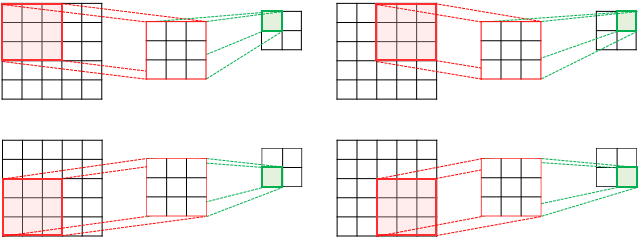

  합성곱층은 합성곱 연산을 통해 이미지 특징을 추출

  합성곱 연산을 통해 나온 결과를 특성맵 feature map

4. 패딩 Padding

  특성맵의 크기가 입력 크기와 동일하게 유지


### 2) 자연어 처리를 위한 1D CNN 

1. 2D 합성곱 : 이미지 처리에서의 합성곱 연산
2. 1D 합성곱

  임베딩층을 거친 후 다음 사진의 스탭을 반복

  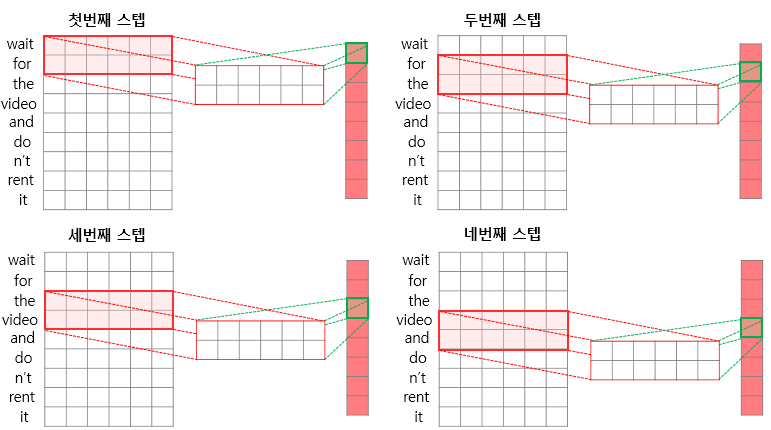

3. 맥스 풀링 Max-pooling

  각 합성곱 연산으로 얻은 결과 벡터에서 가장 큰 값을 가진 스칼라 값을 빼내는 연산

4. 케라스(Keras)로 CNN 구현



In [ ]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

model = Sequential()
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())

### 6) 사전 훈련된 워드 임베딩을 사용한 의도 분류

1. 데이터 로드와 전처리

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from sklearn import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# 의도 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/11.%201D%20CNN%20Text%20Classification/dataset/intent_train_data.csv", filename="intent_train_data.csv")
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/11.%201D%20CNN%20Text%20Classification/dataset/intent_test_data.csv", filename="intent_test_data.csv")

train_data = pd.read_csv('intent_train_data.csv')
test_data = pd.read_csv('intent_test_data.csv')

train_data

,intent,label
0,add another song to the cita rom ntica playlist,AddToPlaylist
1,add clem burke in my playlist pre party r b jams,AddToPlaylist
2,add live from aragon ballroom to trapeo,AddToPlaylist
3,add unite and win to my night out,AddToPlaylist
4,add track to my digster future hits,AddToPlaylist
...,...,...
11779,can a i get the movie schedule for sympathy fo...,SearchScreeningEvent
11780,find movie schedules for animated movies aroun...,SearchScreeningEvent
11781,what time is bordertown trail showing,SearchScreeningEvent
11782,in the neighbourhood find movies with movie times,SearchScreeningEvent


In [2]:
intent_train = train_data['intent'].tolist()
label_train = train_data['label'].tolist()
intent_test = test_data['intent'].tolist()
label_test = test_data['label'].tolist()

In [3]:
train_data['label'].value_counts()

GetWeather              2000
BookRestaurant          1973
SearchScreeningEvent    1959
RateBook                1956
SearchCreativeWork      1954
AddToPlaylist           1942
Name: label, dtype: int64

In [4]:
# 라벨 인코딩
idx_encode = preprocessing.LabelEncoder()
idx_encode.fit(label_train)

label_train = idx_encode.transform(label_train)
label_test = idx_encode.transform(label_test)

In [15]:
label_idx = dict(zip(list(idx_encode.classes_), idx_encode.transform(list(idx_encode.classes_))))

In [5]:
# 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(intent_train)
sequences = tokenizer.texts_to_sequences(intent_train)

In [11]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

In [6]:
print('문장의 최대 길이 :',max(len(l) for l in sequences))
print('문장의 평균 길이 :',sum(map(len, sequences))/len(sequences))

문장의 최대 길이 : 35
문장의 평균 길이 : 9.364392396469789


In [7]:
max_len = 35
# 패딩
intent_train = pad_sequences(sequences, maxlen = max_len)
# 원-핫 인코딩
label_train = to_categorical(np.asarray(label_train))

In [8]:
# 랜덤 시퀀스
indices = np.arange(intent_train.shape[0])
np.random.shuffle(indices)

intent_train = intent_train[indices]
label_train = label_train[indices]

In [9]:
n_of_val = int(0.1 * intent_train.shape[0])

X_train = intent_train[:-n_of_val]
y_train = label_train[:-n_of_val]
X_val = intent_train[-n_of_val:]
y_val = label_train[-n_of_val:]
X_test = intent_test
y_test = label_test

2. 사전 훈련된 워드 임베딩 사용 (GloVe)

In [10]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2022-03-03 13:47:22--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-03-03 13:47:22--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-03-03 13:47:23--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [12]:
embedding_dict = dict()
f = open(os.path.join('glove.6B.100d.txt'), encoding='utf-8')
for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # 100개의 값을 가지는 array로 변환
    embedding_dict[word] = word_vector_arr
f.close()

print(len(embedding_dict['respectable']))

100


In [13]:
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

In [14]:
for word, i in word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

3. 1D CNN을 이용한 의도 분류

In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate

kernel_sizes = [2, 3, 5]
num_filters = 512
dropout_ratio = 0.5

model_input = Input(shape=(max_len,))
output = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
                      input_length=max_len, trainable=False)(model_input)

conv_blocks = []

for size in kernel_sizes:
    conv = Conv1D(filters=num_filters,
                         kernel_size=size,
                         padding="valid",
                         activation="relu",
                         strides=1)(output)
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)

output = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
output = Dropout(dropout_ratio)(output)
model_output = Dense(len(label_idx), activation='softmax')(output)
model = Model(model_input, model_output)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 35)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 35, 100)      987000      ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 34, 512)      102912      ['embedding[0][0]']              
                                                                                                  
 conv1d_1 (Conv1D)              (None, 33, 512)      154112      ['embedding[0][0]']              
                                                                                              

In [17]:
history = model.fit(X_train, y_train,
          batch_size=64,
          epochs=10,
          validation_data=(X_val, y_val))

Epoch 1/10
166/166 [==============================] - 25s 138ms/step - loss: 0.2051 - acc: 0.9395 - val_loss: 0.0541 - val_acc: 0.9847
Epoch 2/10
166/166 [==============================] - 20s 122ms/step - loss: 0.0484 - acc: 0.9870 - val_loss: 0.0410 - val_acc: 0.9890
Epoch 3/10
166/166 [==============================] - 20s 122ms/step - loss: 0.0297 - acc: 0.9926 - val_loss: 0.0463 - val_acc: 0.9830
Epoch 4/10
166/166 [==============================] - 21s 124ms/step - loss: 0.0177 - acc: 0.9953 - val_loss: 0.0400 - val_acc: 0.9915
Epoch 5/10
166/166 [==============================] - 20s 123ms/step - loss: 0.0153 - acc: 0.9968 - val_loss: 0.0399 - val_acc: 0.9924
Epoch 6/10
166/166 [==============================] - 23s 137ms/step - loss: 0.0114 - acc: 0.9967 - val_loss: 0.0425 - val_acc: 0.9898
Epoch 7/10
166/166 [==============================] - 21s 123ms/step - loss: 0.0080 - acc: 0.9982 - val_loss: 0.0375 - val_acc: 0.9907
Epoch 8/10
166/166 [==============================] - 2

In [18]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_len)

y_predicted = model.predict(X_test)
y_predicted = y_predicted.argmax(axis=-1) # 예측을 정수 시퀀스로 변환

print('정확도(Accuracy) : ', sum(y_predicted == y_test) / len(y_test))

정확도(Accuracy) :  0.9933333333333333


### 7) 문자 임베딩 Character Embedding

misunderestimate는 실존하는 단어가 아니지만 mis-가 '잘못 판단하는'의 의미를 담고 있으므로 '잘못 과소평가하다'로 추측가능 

-> 문자 임베딩은 이러한 사람의 이해 능력을 모방

1. 1D CNN을 이용한 문자 임베딩

  1D CNN : 전체 시퀀스 입력 안의 더 작은 시퀀스에 집중하여 정보를 얻어내는 알고리즘 (문자의 N-gram으로 정보 얻어냄)

  ex. 'docker' -> 'd', 'o', 'c', 'k', 'e', 'r' -> 각 문자로 임베딩 -> 1D CNN -> 'docker'의 벡터 얻음
